# Task - 2 (Linear Regression Project)

To Explore Supervised Machine Learning

Simple Linear Regression

* In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading data

* saved it as a csv file in my jupyter notebook by the name Task2.csv

In [4]:
df=pd.read_csv('Task2.csv')

* Checking the head, its info() and describe() methods.

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

# Exploratory Data Analysis

In [12]:
sns.set_style('whitegrid')
sns.set_palette('GnBu_d')

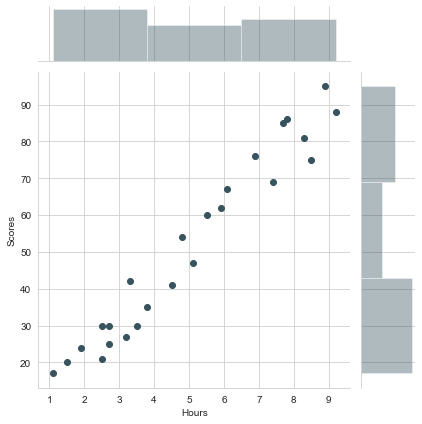

In [13]:
sns.jointplot(x='Hours',y='Scores',data=df)

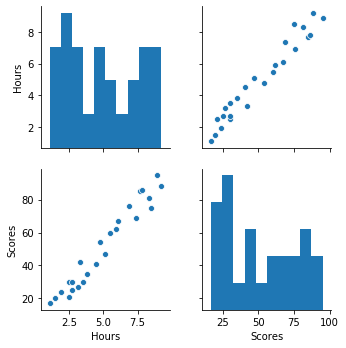

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


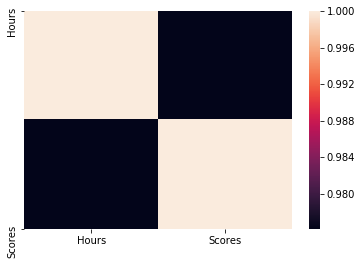

In [11]:
sns.heatmap(df.corr())

* creating a linear model plot

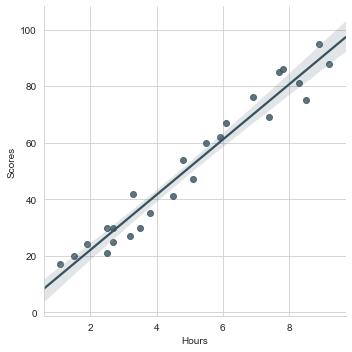

In [14]:
sns.lmplot(x='Hours',y='Scores',data=df)

# Training and testing data

In [21]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

* Using the model_selection.train_test_split from sklearn to split the data into training and testing sets. Setting test_size=0.3 and random_state=101

In [22]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# Training the Model

In [51]:
from sklearn.linear_model import LinearRegression

*Creating an instance of a LinearRegression() model named lm.

In [52]:
lm=LinearRegression()

*Train/fit lm on the training data.

In [53]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*printing the intercept and coefficient of the model.

In [54]:
print(lm.intercept_)

2.1024930747922284


In [55]:
print(lm.coef_)

[9.96651548]


# Predicting Test Data

In [56]:
predictions=lm.predict(X_test)

In [57]:
predictions

array([27.01878177, 78.84466226, 39.97525189, 75.85470762, 56.91832821,
       49.94176737, 33.99534261, 86.81787465])

In [58]:
y_test

array([30, 85, 35, 69, 60, 54, 27, 75], dtype=int64)

*creating a scatterplot of real test values versus the predicted values.

Text(0, 0.5, 'Predicted Y')

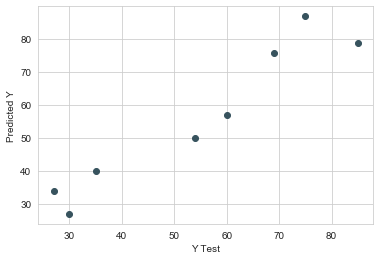

In [59]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Creating a dataframe for the actual versus predicted values.

In [60]:
df1=pd.DataFrame({'Actual_values':y_test,'Predicted_values':predictions})

In [61]:
df1

,Actual_values,Predicted_values
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


*Predicted score if a student study for 9.25 hrs in a
day.

In [62]:
print('Predicted score:',lm.predict([[9.25]]))

Predicted score: [94.29276126]


# Evaluating the Model

In [63]:
from sklearn import metrics

In [64]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333


# Residuals

* plotting a histogram of the residuals.

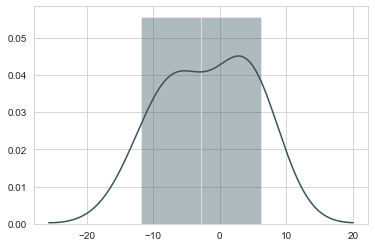

In [69]:
sns.distplot((y_test-predictions))